In [1]:
import pandas as pd

In [12]:
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.value_counts('isFraud')

isFraud
0    6354407
1       8213
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
fraud = df[df['isFraud'] == 1]
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [10]:
df.value_counts('isFlaggedFraud')

isFlaggedFraud
0    6362604
1         16
dtype: int64

In [21]:
df1 = pd.get_dummies(df, columns=['type'])

In [23]:
df1.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [24]:
df1.columns

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [25]:
cols = ['step', 
        'amount', 
        'oldbalanceOrg',
        'newbalanceOrig', 
        'type_CASH_IN', 
        'type_CASH_OUT', 
        'type_DEBIT',
        'type_PAYMENT', 
        'type_TRANSFER']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df1[cols], 
                                                    df1['isFraud'], 
                                                    test_size=0.3, 
                                                    random_state=1)

<Axes: >

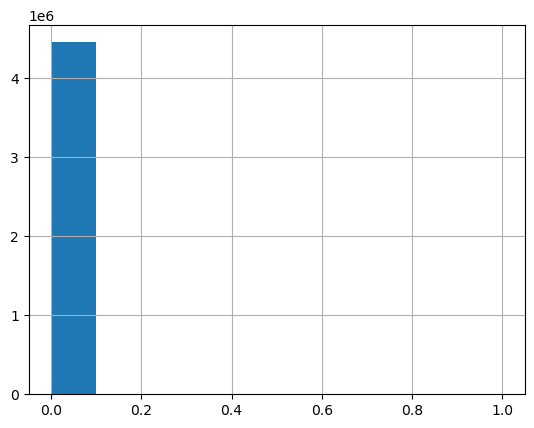

In [33]:
y_train.hist()

<Axes: >

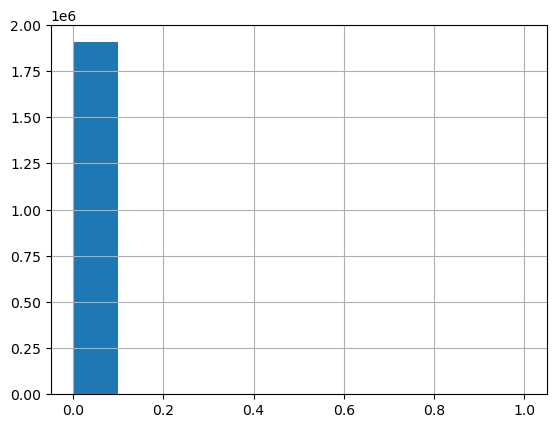

In [34]:
y_test.hist()

In [28]:
X_test.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [45]:
dt = DecisionTreeClassifier(max_depth=4,
                            min_samples_leaf=20,
                            random_state = 42)

dt.fit(X_train[cols], y_train)

predictions = dt.predict(X_test[cols])

print(classification_report(y_test, 
                            predictions,
                            target_names=["Fraud", "Not_Fraud"]))

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00   1906318
   Not_Fraud       1.00      0.19      0.33      2468

    accuracy                           1.00   1908786
   macro avg       1.00      0.60      0.66   1908786
weighted avg       1.00      1.00      1.00   1908786



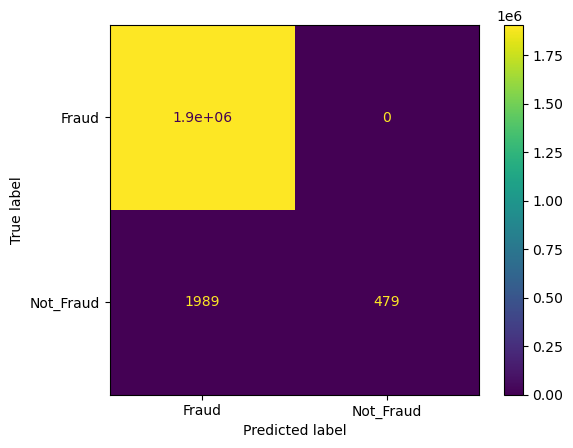

In [46]:
cm = confusion_matrix(y_test, 
                      predictions, 
                      labels=dt.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('Fraud','Not_Fraud')
                             )

disp.plot();

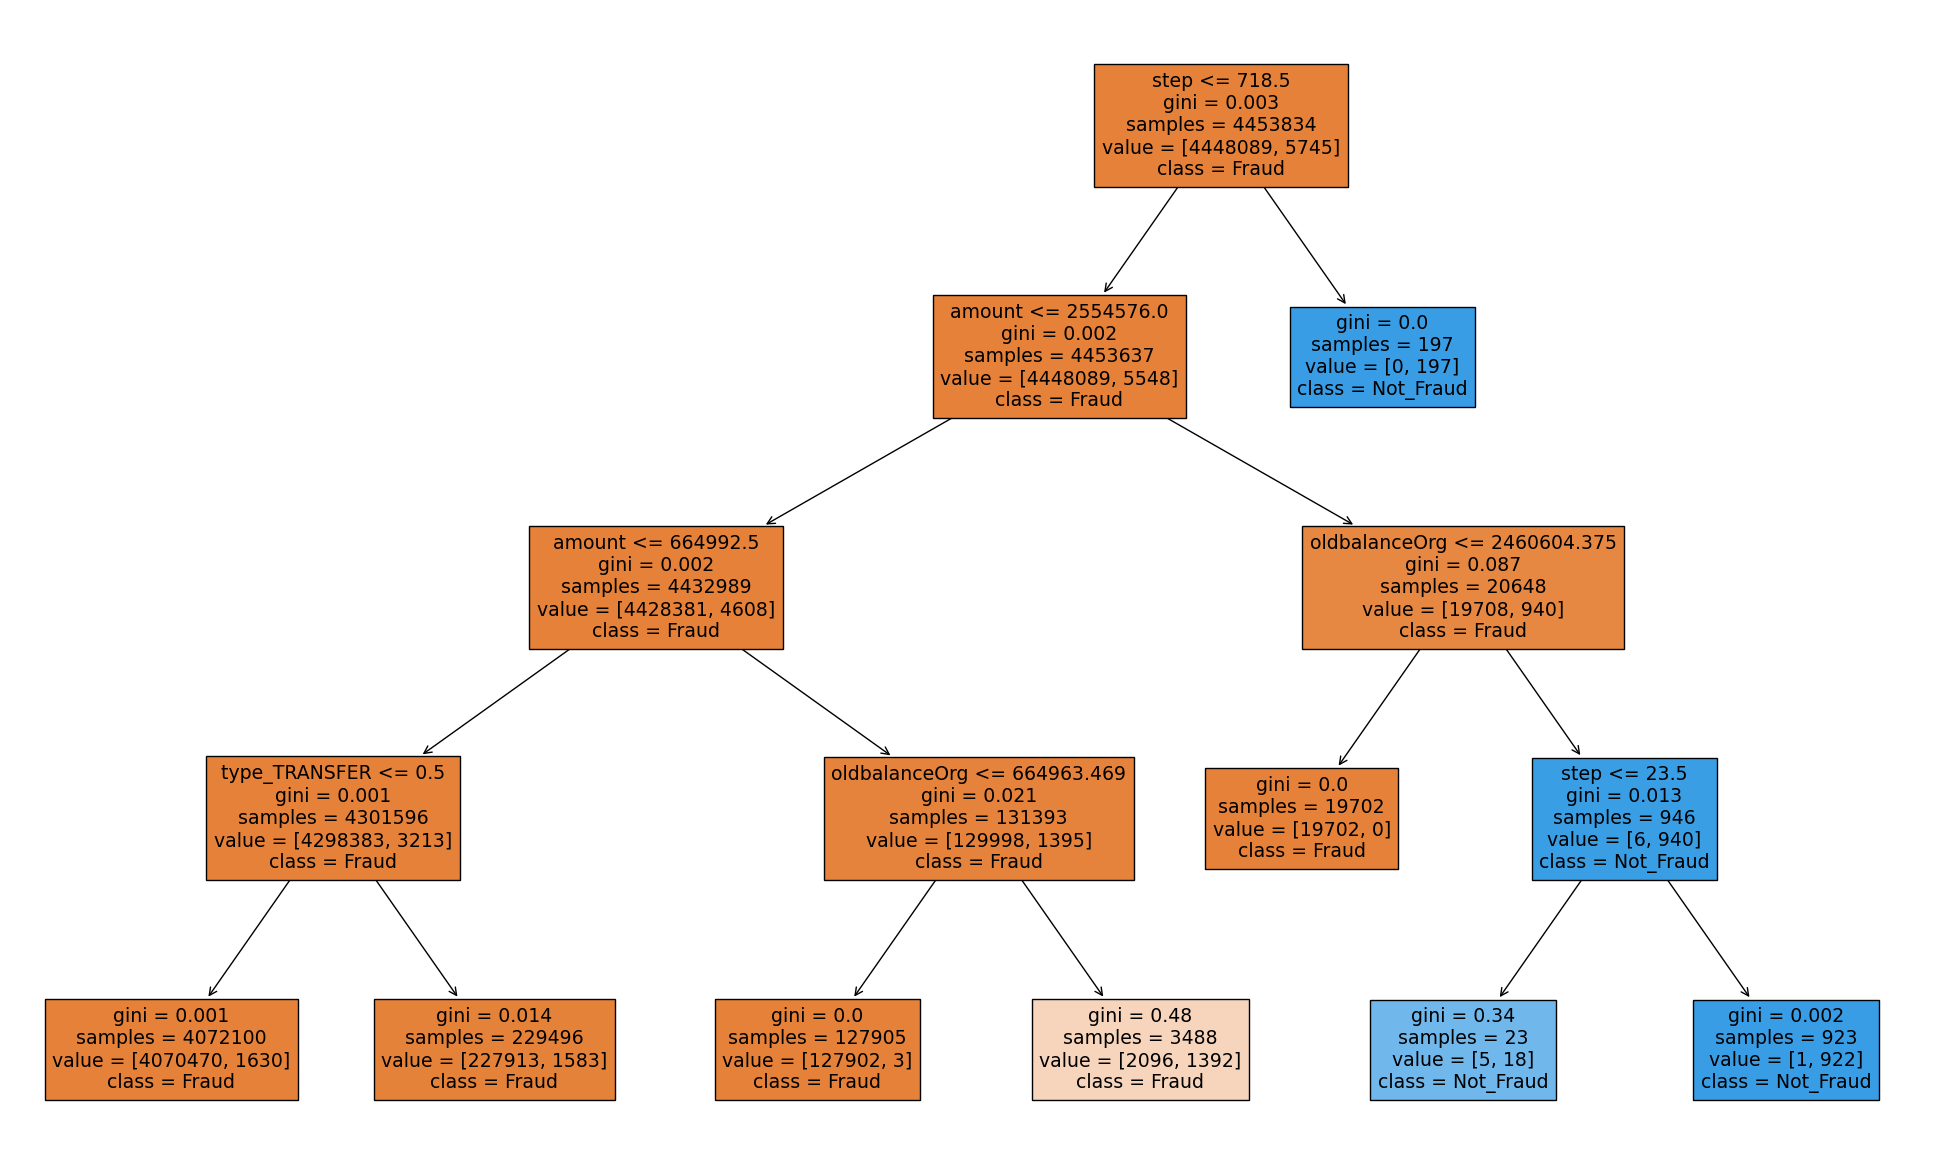

In [47]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,15))

_ = tree.plot_tree(dt,
              feature_names = X_train[cols].columns,
               class_names = ['Fraud','Not_Fraud'],
               filled=True
              )

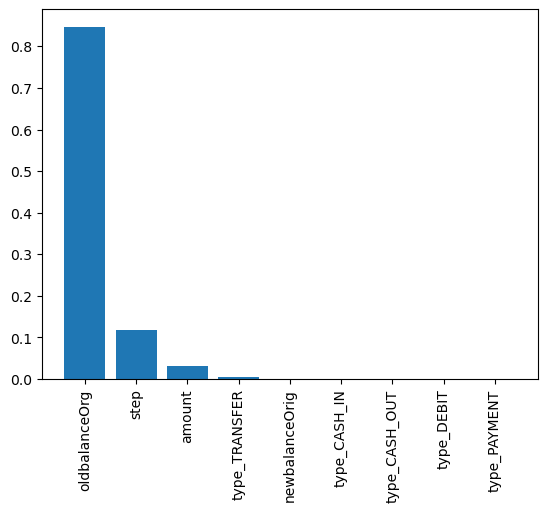

In [49]:
f_i = list(zip(dt.feature_names_in_,dt.feature_importances_)) 

f_i.sort(key = lambda x : x[1],reverse=True)

plt.bar([x[0] for x in f_i],[x[1] for x in f_i])
plt.xticks(rotation=90)

plt.show()

Accuracy of the model:0.9681    Number of trees = 1
Accuracy of the model:0.9853    Number of trees = 11
Accuracy of the model:0.9853    Number of trees = 21
Accuracy of the model:0.9863    Number of trees = 31
Accuracy of the model:0.9853    Number of trees = 41
Accuracy of the model:0.9845    Number of trees = 51
Accuracy of the model:0.9842    Number of trees = 61
Accuracy of the model:0.9847    Number of trees = 71
Accuracy of the model:0.9847    Number of trees = 81
Accuracy of the model:0.9846    Number of trees = 91
              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00   1906318
   Not_Fraud       1.00      0.19      0.33      2468

    accuracy                           1.00   1908786
   macro avg       1.00      0.60      0.66   1908786
weighted avg       1.00      1.00      1.00   1908786



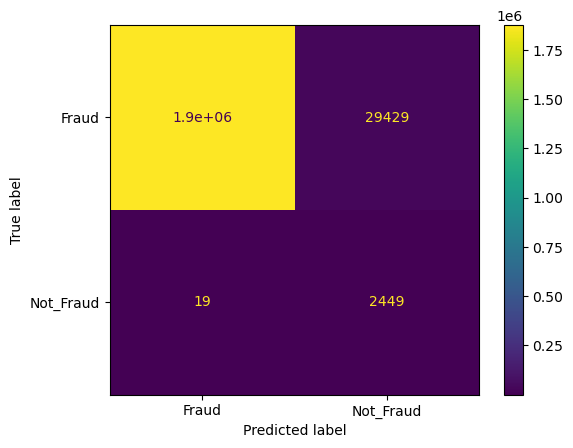

In [50]:
from sklearn import metrics 

for trees in range(1,100,10):

    rf = RandomForestClassifier(
                                n_estimators = trees,
                                max_depth = 10,
                                min_samples_leaf=5,
                                bootstrap=True,
                                class_weight = 'balanced_subsample',
                                random_state = 42
                                       ) 

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)


    print(f"Accuracy of the model:{metrics.accuracy_score(y_test, y_pred).round(4)}    Number of trees = {trees}")

print(classification_report(y_test, 
                        predictions,
                        target_names=["Fraud", "Not_Fraud"]))


predictions = rf.predict(X_test)

cm = confusion_matrix(y_test, 
                      predictions, 
                      labels=rf.classes_
                     )

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=('Fraud','Not_Fraud')
                             )

disp.plot();